Predicting Income Groups of people using their demographic information

In [155]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [156]:
# Loading datasets
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train.head()


,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


# Univariate Analysis

In [157]:

# Data types for each column
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

### 1. Continuous Variables

In [158]:
train.describe()

,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


### 2. Categorical Variables

In [159]:
categorical_variables = train.dtypes.loc[train.dtypes == 'object'].index
print (categorical_variables)

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


In [160]:
# Determine unique entities for each column
train[categorical_variables].apply(lambda x: len(x.unique()))

Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

#### 2.1 Analyzing Race

In [161]:
train['Race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: Race, dtype: int64

In [162]:
# Percentage of people in each race
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

### Analysing Native Country


In [163]:
train['Native.Country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [164]:
# Percentage of people from the native country
train['Native.Country'].value_counts()/train.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

~90% are from United states while only ~2% are from Mexico.

In [165]:
# Calculating Inter-Quartile Range for age variable
train['Age'].quantile(0.75) - train['Age'].quantile(0.25)


20.0

# Mutlivariate Analysis

Multivariate Analysis finds out the relationship between two or more variables. Here, we look for association and disassociation between variables at a pre-defined significance level.
The type of visualization technique to use depends on the type of each variable. Thus there can be 3 combinations of the type of the 2 variables:

 1. categorical - categorical 
 2. continuous - continuous
 3. categorical - continuous    

## 1. Both Categorical

In [166]:
# Cross tabulation of Sex and Income Group
ct = pd.crosstab(train['Sex'],train['Income.Group'], margins = True)
print (ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


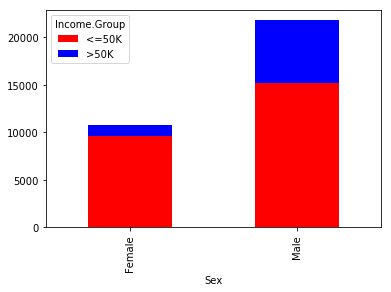

In [167]:
# plotting
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind = 'bar', stacked = True, color = ['red','blue'], grid = False)

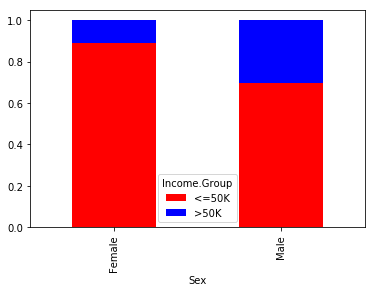

In [168]:
# Plotting percentages of females and males in each group
def perConvert(ser):
    return ser/float(ser[-1])
ct2 = ct.apply(perConvert, axis = 1)
ct2.iloc[:-1,:-1].plot(kind = 'bar', stacked = True, color = ['red','blue'], grid = False)

## 2. Both Continuous

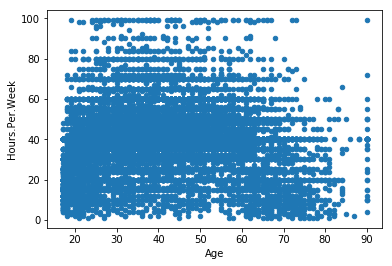

In [169]:
# Scatter plot of age and Hours-per-week
train.plot('Age','Hours.Per.Week', kind ='scatter')

This shows no real relationship between Age and Hours-Per-Week. Even intuitively we were not expecting any specific trend so this is good. In other cases, you might figure out interesting trends which can be exploited.

## 3. Categorical - Continuous

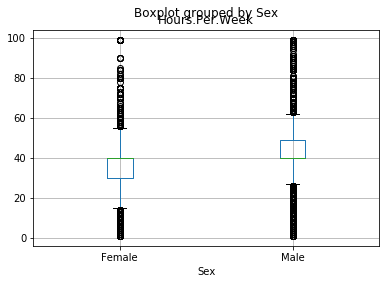

In [170]:
train.boxplot(column = 'Hours.Per.Week', by ='Sex')

In [171]:
# Percentage of males with income <=50K
train['Sex'][train['Income.Group'] == '<=50K'].value_counts()/train.shape[0]


Male      0.464605
Female    0.294586
Name: Sex, dtype: float64

# Missing Value Treatment

## 1. Check Missing Values

In [172]:
# MIssing Values in training dataset
train.apply(lambda x: sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [173]:
# Missing values in test dataset
test.apply(lambda x: sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

Here we have missing values in 3 variables in both test and train:

 1. Workclass (categorical)
 2. Occupation (categorical)
 3. Native-Country (categorical)

Since all of these are categorical, we can simply impute them with the mode values.


# 2. Imputation

In [174]:
# import function
from scipy.stats import mode
mode((train['Workclass'].astype(str))).mode[0]

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'Private'

In [175]:
# Imputing values 
var_to_impute = ['Workclass','Occupation', 'Native.Country']
for var in var_to_impute:
    train[var].fillna(mode((train[var].astype(str))).mode[0], inplace = True)
    test[var].fillna(mode((test[var].astype(str))).mode[0], inplace = True)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [176]:
# Checking missing values
train.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
Income.Group      0
dtype: int64

In [177]:
test.apply(lambda x: sum(x.isnull()))

ID                0
Age               0
Workclass         0
Education         0
Marital.Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours.Per.Week    0
Native.Country    0
dtype: int64

# Outlier Treatment

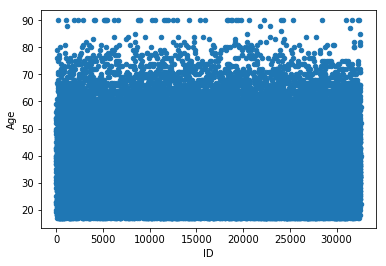

In [178]:
# Checking the outlier by scatter plots
%matplotlib inline
train.plot('ID','Age', kind ='scatter')

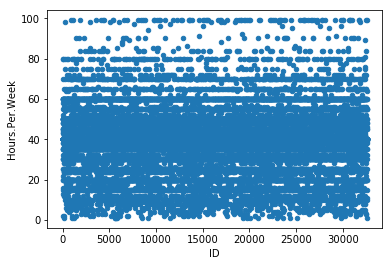

In [179]:
# ID vs Hours-Per-Week
train.plot('ID','Hours.Per.Week', kind = 'scatter')

In both of the above cases, you would notice that there are no real outliers. One thing to note here is that outliers need not just be a value outside the general cluster of data, as shown in the video lecture.
You should also look for values which are not practically possible. For instance, if any of the age or hours per week was negative, then we should certainly treat it like a missing value.

# Variable Transformation

Depending on the business scenario, we can combine the categories with very few observations. As a thumbrule, lets combine categories with less than 5% of the values.

In [180]:
# Determine the percentage of observations in each category
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Self-emp-not-inc    0.078038
Local-gov           0.064279
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: Workclass, dtype: float64

In [181]:
categories_to_combine = ['State-gov','Self-emp-inc','Federal-gov', 'Without-pay', 'Never-worked']
# Run a loop and replace all the value with others
for cat in categories_to_combine:
    train['Workclass'].replace({cat:'Others'}, inplace = True)
    test['Workclass'].replace({cat : 'Others'}, inplace = True)

In [182]:
# Checking new categories in train
train['Workclass'].value_counts()/train.shape[0]

Private             0.753417
Others              0.104266
Self-emp-not-inc    0.078038
Local-gov           0.064279
Name: Workclass, dtype: float64

In [183]:
# Checking new categories in train
test['Workclass'].value_counts()/test.shape[0]

Private             0.747681
Others              0.107119
Self-emp-not-inc    0.081138
Local-gov           0.064062
Name: Workclass, dtype: float64

## Combining the rest of the categories in other columns

### 1. Make a list of vairables to combine.


In [184]:
# Picking only variables with the dtype = object
categorical_variables = list(train.dtypes.loc[train.dtypes == 'object'].index)
categorical_variables

['Workclass',
 'Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native.Country',
 'Income.Group']

In [185]:
# Remove workplace variable as already been transformed
categorical_variables = categorical_variables[1:]
categorical_variables

['Education',
 'Marital.Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native.Country',
 'Income.Group']

In [186]:
# Check the current number of unique values
train[categorical_variables].apply(lambda x: len(x.unique()))

Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    41
Income.Group       2
dtype: int64

In [187]:
# 2. Run a loop and combine these values
for column in categorical_variables:   
    frq = train[column].value_counts()/train.shape[0]
    categories_to_combine = frq.loc[frq.values<0.05].index
    
    for cat in categories_to_combine:
        train[column].replace({cat:'Others'}, inplace = True)
        test[column].replace({cat : 'Others'}, inplace = True)

In [188]:
train[categorical_variables].apply(lambda x: len(x.unique()))

Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
Income.Group      2
dtype: int64

In [189]:
test[categorical_variables[:-1]].apply(lambda x: len(x.unique()))

Education         5
Marital.Status    4
Occupation        8
Relationship      5
Race              3
Sex               2
Native.Country    2
dtype: int64

In [190]:
train['Hours.Per.Week'].min()

1

In [191]:
x = pd.cut(train['Hours.Per.Week'],20, labels = range(1,101,5))
x.value_counts()

36    16100
46     3496
41     2442
31     1635
16     1547
61     1519
26     1302
21     1015
56      841
11      645
6       531
71      365
66      277
51      217
1       205
81      182
96      105
76       83
91       34
86       20
Name: Hours.Per.Week, dtype: int64

# Predictive Modelling
Since this is a classification problem, we can start with various models like logistic regression, naive bayes, decision trees, etc. Here we will run a decision tree model as an example.
For modeling using sklearn in Pandas, we have to adopt the following steps:

 1. Data Preprocessing: sklearn accepts only numeric data so we've to convert text to numbers
 2. Training model: fit the model on training data
 3. Making predictions: use the model to make predictions on test data
 4. Analyze results: compare the train and test accuracy and derive insights required to improve the model



## Step 1: Data Preprocessing

sklearn provides a function LabelEncoder for converting categories to numbers in range 0,1..(N-1) where N is the number of categories.

In [192]:
from sklearn.preprocessing import LabelEncoder
categorical_variables = train.dtypes[train.dtypes == 'object'].index
categorical_variables

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [193]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,Others,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Others,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,Others,Married-civ-spouse,Others,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Others,Black,Female,40,Others,<=50K


In [194]:
# Using LabelEncoder
le = LabelEncoder()
for var in categorical_variables:
    train[var] = le.fit_transform(train[var])

for var in categorical_variables[:-1]:
    test[var] = le.fit_transform(test[var])

train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,1,0,2,0,1,2,1,40,1,0
1,2,50,3,0,1,2,0,2,1,13,1,0
2,3,38,2,1,0,5,1,2,1,40,1,0
3,4,53,2,3,1,5,0,0,1,40,1,0
4,5,28,2,0,1,6,2,0,0,40,0,0


In [195]:
test.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,32562,25,2,3,2,3,3,0,1,40,1
1,32563,38,2,1,1,5,0,2,1,50,1
2,32564,28,0,3,1,5,0,2,1,40,1
3,32565,44,2,4,1,3,0,0,1,40,1
4,32566,18,2,4,2,6,3,2,0,30,1


In [196]:
train.dtypes

ID                int64
Age               int64
Workclass         int64
Education         int64
Marital.Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Hours.Per.Week    int64
Native.Country    int64
Income.Group      int64
dtype: object

## Step 2: Fitting the model

In [197]:
from sklearn.tree import DecisionTreeClassifier

Defining Predictor variables - these are all variables excluding the target variable Income.Group and ID

In [198]:
dependent_var = 'Income.Group'
independent_vars = [x for x in train.columns if not x in ['ID', dependent_var]]
print (independent_vars)

['Age', 'Workclass', 'Education', 'Marital.Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Hours.Per.Week', 'Native.Country']


Now that we have the predictors, lets run the model with the following benchmark parameters:

 1. max_depth = 10
 2. min_samples_leaf = 100 
 3. max_features = 'sqrt'



In [199]:
# Initialize the algorithm
model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf =100, max_features = 'sqrt')
# Fitting the model
model.fit(train[independent_vars], train[dependent_var])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Step 3: making Predictions

In [200]:
predictions_train = model.predict(train[independent_vars])
predictions_test = model.predict(test[independent_vars])
print (predictions_test)

[0 0 0 ..., 1 0 1]


## Step 4: Analysing the results

In [201]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(train[dependent_var], predictions_train)
print ('Training Dataset Accuracy: ', acc_train)

Training Dataset Accuracy:  0.819170172906


In [202]:
d = {'ID':test['ID'].values, 'Income.Group': predictions_test}
submission = pd.DataFrame(data = d)
submission['Income.Group'] = submission['Income.Group'].replace({0 : '<=50K', 1 : '>=50K'})

In [204]:
# Save file to CSV
submission.to_csv('submission.csv')

In [208]:
from IPython.display import FileLink, FileLinks

In [211]:
print(check_output(["ls"]).decode("utf8"))

__notebook_source__.ipynb
submission.csv



In [216]:
FileLinks('.')

./
  __notebook_source__.ipynb
  submission.csv